
# Тема: Работа с пропусками: удаление и одномерные способы импутации (замещения) признаков

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

### 1. Загрузите датасет `Titanic.csv` и выведите первые 5 строк. Вывидете информацию об этом датафрейме и его размеры.

In [ ]:
df = pd.read_csv('Titanic_missing.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

### 2. Выведите количество пропущенных значений в каждом столбце. Визуализируйте эту информацию.

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


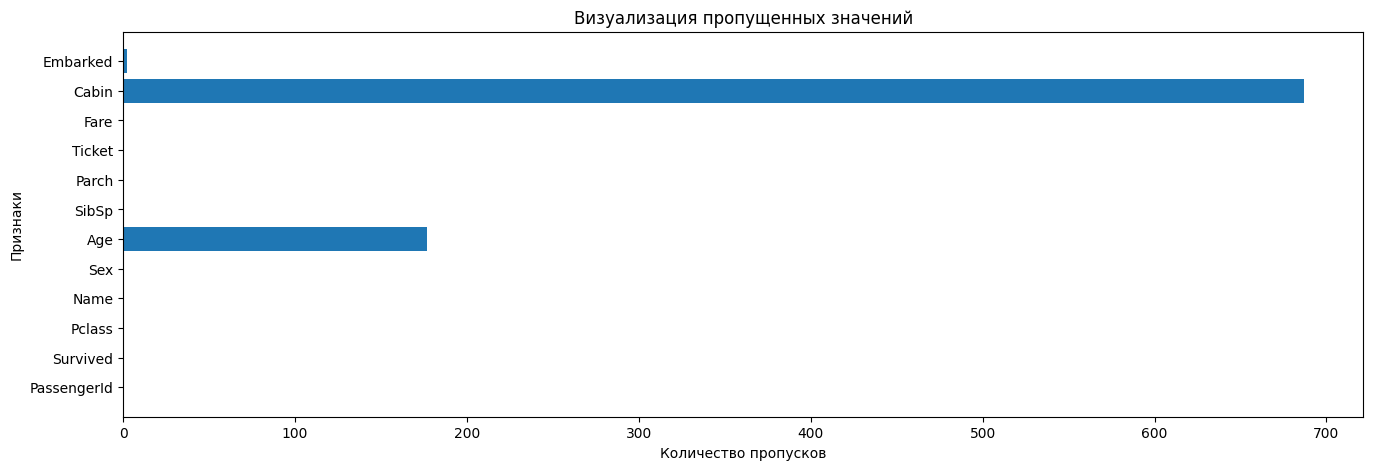

In [ ]:
fig = plt.figure(figsize = (16,5))
plt.barh(df.columns, df.isna().sum().values)
plt.title('Визуализация пропущенных значений')
plt.xlabel('Количество пропусков')
plt.ylabel('Признаки')
plt.show()

### 3. Cделайте копию датасета и удалите в ней с помощью метода .dropna() все строки с пропусками. Выведите размер полученного датафрейма. Сделайте вывод о том, можно ли было удалять все строки с пропусками.

In [ ]:
df_copy = df.copy()
df_copy = df_copy.dropna()
df_copy.shape

(183, 12)

### 4. Удалите в исходном датафрейме столбец с очень большим количеством пропучков `Cabin`.

In [ ]:
df = df.drop('Cabin', axis = 1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### 5. Постройте гистограмму распределения признака  `Age`.  Выведите среднее арифметическое и медиану по признаку `Age`.

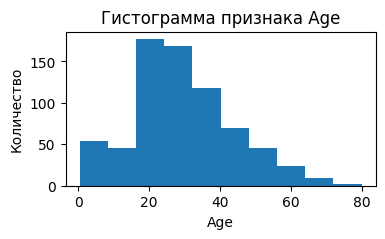

In [ ]:
fig = plt.figure(figsize = (4,2))
plt.hist(df['Age'])
plt.title('Гистограмма признака Age')
plt.xlabel('Age')
plt.ylabel('Количество')
plt.show()

In [ ]:
df['Age'].mean(), df['Age'].median()

(np.float64(29.69911764705882), 28.0)

###  6. Заполните пропуски в признаке `Age` медианным значением с помощью метода .fillna().  И снова постройте гистограмму распределения этого признака. Выведите среднее арифметическое и медиану по признаку `Age` после заполнения.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

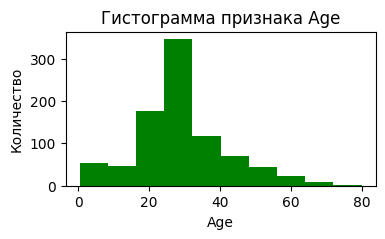

In [ ]:
fig = plt.figure(figsize = (4,2))
plt.hist(df['Age'], color = 'green')
plt.title('Гистограмма признака Age')
plt.xlabel('Age')
plt.ylabel('Количество')
plt.show()

In [ ]:
df['Age'].mean(), df['Age'].median()

(np.float64(29.36158249158249), 28.0)

### 7. Теперь категориальный признак `Embarked` с пропусками замените модой. Убедитесь, что пропусков больше нет.

In [ ]:
df['Embarked'].value_counts(dropna = False)

,count
Embarked,
S,644
C,168
Q,77
NaN,2


In [ ]:
moda = df['Embarked'].value_counts(dropna = False).index[0]
moda

'S'

In [ ]:
df['Embarked'] = df['Embarked'].fillna(moda)
df['Embarked'].isna().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### 8. Заполните пропуски в признаках `Age` медианным значением и модой в Embarked с помощью SimpleImputer. С помощью атрибута statistics_ выведите соответствующие значения статисик. Убедитесь, что значения в признаках будут те же, что и при использовании .fillna().

In [ ]:
df_simple = pd.read_csv('Titanic_missing.csv')
df_simple = df_simple.drop('Cabin', axis = 1)
df_simple.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
type(df_simple)

pandas.core.frame.DataFrame

In [ ]:
inp_numeric = SimpleImputer(missing_values = np.nan, strategy = 'median')
inp_numeric.fit(df_simple[['Age']])

SimpleImputer(strategy='median')

In [ ]:
inp_numeric.statistics_, df_simple['Age'].mean()

(array([28.]), np.float64(29.69911764705882))

In [ ]:
df_simple[['Age']] = inp_numeric.transform(df_simple[['Age']])
df_simple[['Age']].isna().sum()

,0
Age,0


In [ ]:
(df['Age'] != df_simple['Age']).sum()

np.int64(0)

In [ ]:
imp_categorial = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp_categorial.fit(df_simple[['Embarked']])

SimpleImputer(strategy='most_frequent')

In [ ]:
imp_categorial.statistics_, df_simple['Embarked'].value_counts().index[0]

(array(['S'], dtype=object), 'S')

In [ ]:
df_simple[['Embarked']]=imp_categorial.transform(df_simple[['Embarked']])
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


1. Загрузите датасет `Titanic.csv` и выведите информацию о нём.

In [ ]:
titanic = pd.read_csv('Titanic_missing.csv')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. Замените значения в признаке 'Sex' в соответствии со словарём {'male': 1, 'female': 0}. А остальные признаки типа object удалите. Снова выведите информацию о данных.

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})

In [ ]:
titanic = titanic.select_dtypes(exclude=['object'])

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


3. Отдедите целевую переменную 'Survived' и обозначьте данные за `X`, а целевую переменную за `y`. Выведите их размеры.

In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [ ]:
X.shape, y.shape

((891, 7), (891,))

4. Сделайте hold-out разбиение данных на два набора, взяв в тестовый набор 30% данных и указав random_state=100. Выведите их размеры.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 7), (268, 7), (623,), (268,))

5. Выведите количество пропущенных значений в X и в X_train.

In [ ]:
X.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


In [ ]:
X_train.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,128
SibSp,0
Parch,0
Fare,0


6. С помощью SimpleImputer замените пропущенные значения в признаке `Age` у данных X_train на среднее значение. Убедитесь, что пропусков больше нет. Выведите среднее значение признака `Age` у данных X_train с помощью атрибута `statistics_`, а так же при помощи  метода `.mean()`. Убедитесь, что результаты получатся одинаковые.

In [ ]:
inp_numeric = SimpleImputer(missing_values = np.nan, strategy = 'median')
X_train['Age'] = inp_numeric.fit_transform(X_train[['Age']])

In [ ]:
X_train.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [ ]:
inp_numeric.statistics_[0], X_train['Age'].mean()

(np.float64(28.5), np.float64(29.741171749598717))

7. С помощью SimpleImputer замените пропущенные значения в признаке `Age` у данных X_test. Выведите среднее значение признака `Age` у данных X_test.

In [ ]:
X_test['Age'] = inp_numeric.transform(X_test[['Age']])

In [ ]:
X_test.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [ ]:
X_test['Age'].mean()

np.float64(28.809402985074627)

8. Обучите модель логистической регрессии на обучающих данных. Сделайте предсказание для лучшей модели на тестовом наборе данных и оцените качество модели с использованием метрик `accuracy` и `f1`.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
model = LogisticRegression(random_state=100, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy, f1

(0.7910447761194029, 0.72)

9. Терерь вместо hold-out разбиения сделайте 3-блочную перекрёстную проверку для той же модели при помощи функции `cross_validate`, выполняя заполнение пропусков при помощи SimpleImputer внутри перекрёстной проверки, используя Pipeline.

In [ ]:
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=100, max_iter=1000))
])

In [ ]:
accuracy_results = cross_val_score(
    pipe, X, y, cv=3, scoring='accuracy'
)

In [ ]:
f1_results = cross_val_score(
    pipe, X, y, cv=3, scoring='f1'
)

10. Выведите средние значения метрик `accuracy` и `f1`

In [ ]:
accuracy_results.mean()

np.float64(0.7991021324354658)

In [ ]:
f1_results.mean()

np.float64(0.7253086419753086)